In [287]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [288]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [289]:
df= pd.read_csv(r'hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [290]:
type(df)

pandas.core.frame.DataFrame

In [291]:
df.shape

(119390, 32)

### Checking and Filling the missing value

In [292]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [293]:
df2= df.drop(['agent','company'],axis=1)

In [294]:
df2.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [295]:
df2['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [296]:
df2['country'].fillna(df['country'].value_counts().index[0],inplace=True)

In [297]:
df2.fillna(0,inplace=True)

In [298]:
df2.isnull().sum().sum()

0

In [299]:
filter1= (df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [300]:
data= df[~filter1]
data.shape

(119210, 32)

In [301]:
df.shape

(119390, 32)

### How many guests are from which country

In [302]:
data['is_canceled'].unique()

array([0, 1], dtype=int64)

In [303]:
len(data[data['is_canceled']==0])

75011

In [304]:
data[data['is_canceled']==0]['country'].value_counts()/75011

PRT    0.279652
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [305]:
country_wise_data= data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [306]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [307]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [308]:
import plotly.express as px

In [309]:
px.choropleth(country_wise_data,
             locations=country_wise_data['country'],
             color=country_wise_data['no_of_guests'],
             hover_name=country_wise_data['country'],
             title='Home country of guests'
             )

### How much do guests pay for a room per night

In [310]:
data2= data[data['is_canceled']==0]

In [311]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0.5, 1.0, 'Price of room type per night and per person')

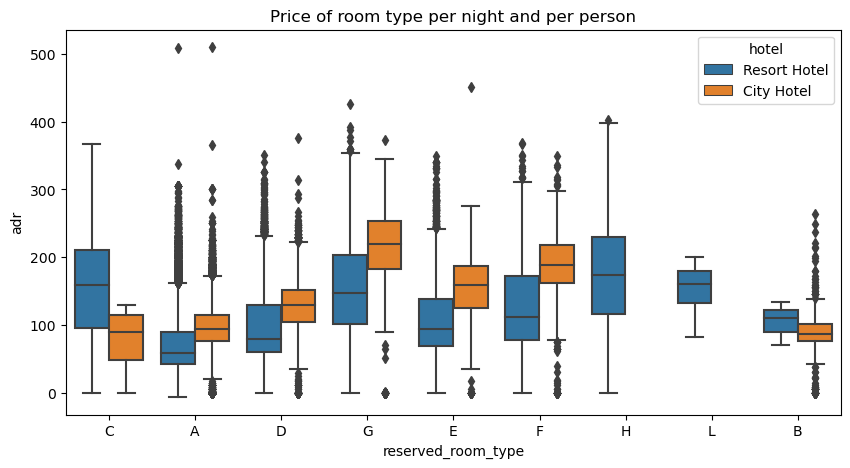

In [312]:
plt.figure(figsize=(10,5))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data= data2)
plt.title('Price of room type per night and per person')

### Which are the most busy month?

In [313]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [314]:
data_resort= data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city= data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [315]:
data_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [316]:
rush_resort= data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [317]:
rush_city= data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [318]:
final_rush= rush_resort.merge(rush_city, on='month')

In [319]:
final_rush.columns=['month','no_of_guests_x','no_of_guests_y']
final_rush

,month,no_of_guests_x,no_of_guests_y
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [320]:
px.line(data_frame=final_rush, x='month', y=['no_of_guests_x','no_of_guests_y'])

### Which month has highest adr?

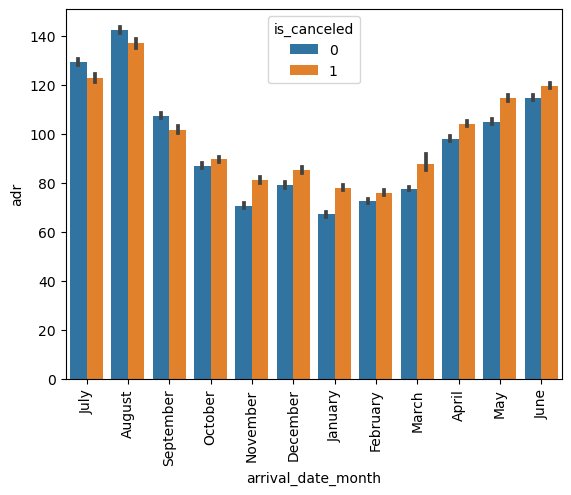

In [321]:
sns.barplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

### How to create more feature

In [322]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [323]:
def family(row):
    if (row['adults']>0) & (row['children']>0 & row['babies']>0):
        return 1
    else:
        return 0

In [324]:
data['is_family'] = data.apply(family, axis=1)

In [325]:
data['total_customer']= data['adults'] + data['babies'] + data['children']

In [326]:
data['total_nights'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [327]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1


In [328]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [329]:
dict= {'No Deposit': 0, 'Refundable': 0, 'Non Refund': 1}

In [330]:
data['deposit_given']= data['deposit_type'].map(dict)

In [331]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [332]:
data.drop(columns=['adults','children','babies','deposit_type',],axis=1,inplace=True)

In [333]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

### How to apply feature encoding on data

In [334]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
agent                             float64
company                           float64
days_in_waiting_list                int64
customer_type                      object
adr                               

In [335]:
cate_features= [col for col in data.columns if data[col].dtypes=='object']
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [336]:
num_features= [col for col in data.columns if data[col].dtypes!='object']
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [337]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [338]:
data_cate= data[cate_features]
data_cate.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015


In [339]:
data_cate['cancellation']= data['is_canceled']

In [340]:
cols= data_cate.columns
cols= cols[0:-1]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [341]:
for col in cols:
    dict2= data_cate.groupby([col])['cancellation'].mean().to_dict()
    data_cate[col]=data_cate[col].map(dict2)

In [342]:
data_cate.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0
1,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0.0,0.985075,0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0.0,0.985075,0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,0.522876,0


### How to handle outliers

In [343]:
dataframe= pd.concat([data_cate,data[num_features]],axis=1)
dataframe.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,...,NaN,NaN,0,0.0,0,0,0,2.0,0,0
1,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,...,NaN,NaN,0,0.0,0,0,0,2.0,0,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0.0,...,NaN,NaN,0,75.0,0,0,0,1.0,1,0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0.0,...,304.0,NaN,0,75.0,0,0,0,1.0,1,0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,...,240.0,NaN,0,98.0,0,1,0,2.0,2,0


In [344]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [345]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

<Axes: xlabel='lead_time', ylabel='Density'>

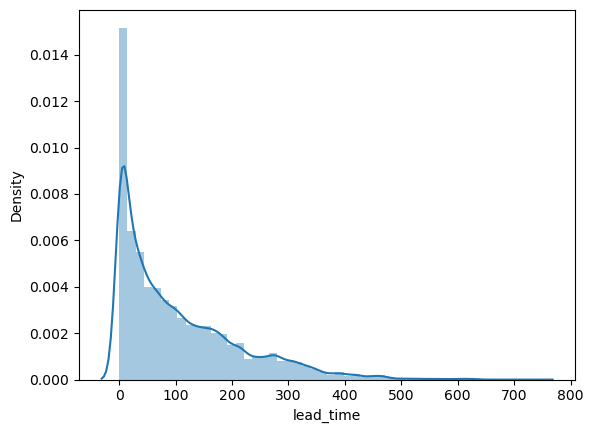

In [346]:
sns.distplot(dataframe['lead_time'])

In [347]:
def handle_outlier(col):
    dataframe[col]= np.log1p(dataframe[col])

In [348]:
handle_outlier('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

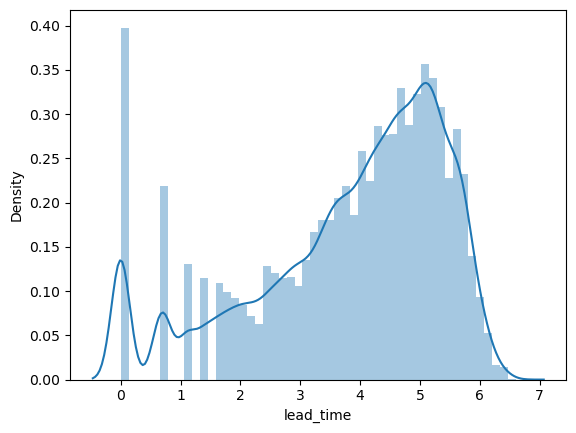

In [349]:
sns.distplot(dataframe['lead_time'])

<Axes: xlabel='adr', ylabel='Density'>

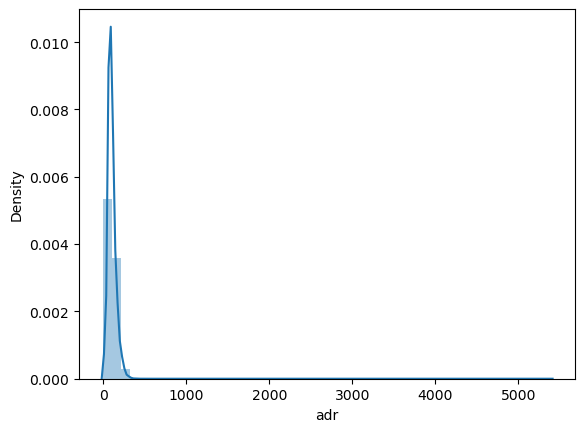

In [350]:
sns.distplot(dataframe['adr'])

In [351]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14969,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,273.0,NaN,0,-6.38,0,0,0,2.0,10,0


<Axes: xlabel='adr', ylabel='Density'>

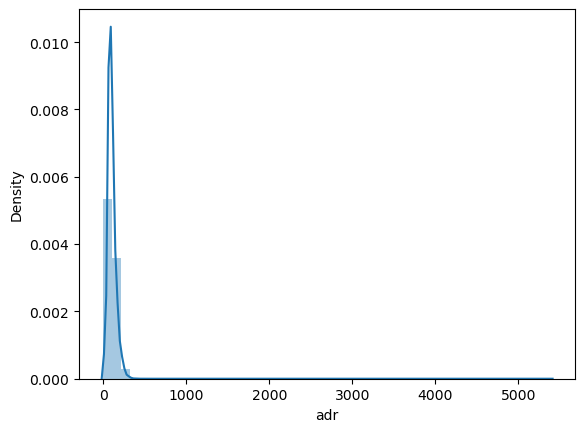

In [352]:
sns.distplot(dataframe['adr'].dropna())

### Select important features using corel;ation & univariate

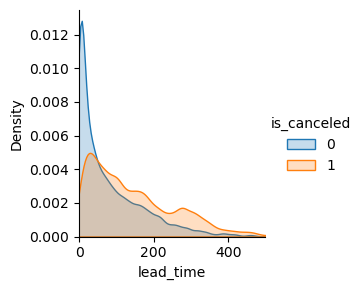

In [353]:
sns.FacetGrid(data, hue='is_canceled', xlim=(0,500)).map(sns.kdeplot, 'lead_time', shade=True).add_legend()

In [354]:
corr= dataframe.corr()
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.035098,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.790482,-0.364682,0.072725,0.098522,-0.218961,-0.043478,NaN,-0.038772,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.050413,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.027666,-0.022334,0.029164,0.280913,-0.021910,0.002763,NaN,0.079088,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022425,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,-0.096816,-0.118572,-0.031562,-0.034308,0.003455,0.006875,NaN,-0.003449,-0.055689,0.047597
country,-0.035098,-0.050413,0.022425,1.000000,0.084743,-0.125226,0.153287,0.128403,-0.031092,0.360995,...,0.057877,-0.224507,0.068043,-0.130246,0.004774,-0.201682,NaN,-0.114925,-0.161204,0.398957
market_segment,0.102592,0.047902,-0.026007,0.084743,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.084879,0.285168,0.096385,-0.113251,-0.145726,-0.155463,NaN,-0.023939,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.125226,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.134485,0.185883,0.048001,0.044939,-0.146562,0.075047,NaN,0.087748,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153287,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,-0.146356,-0.031010,0.068336,-0.301822,-0.093401,-0.161406,NaN,-0.246339,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.128403,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.196173,-0.101742,0.067129,-0.184677,-0.131035,-0.135337,NaN,-0.229073,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.031092,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,-0.008788,-0.282251,-0.101833,0.175360,0.061786,0.137114,NaN,0.124348,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.360995,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.083389,-0.023439,0.054301,0.046492,-0.195701,-0.234877,NaN,0.044811,0.018554,0.481507


In [355]:
corr['is_canceled'].sort_values(ascending=True)    # need to drop the higher and lower corelation due to overfitting

total_of_special_requests        -0.234877
required_car_parking_spaces      -0.195701
booking_changes                  -0.144832
is_repeated_guest                -0.083745
agent                            -0.083389
previous_bookings_not_canceled   -0.057365
company                          -0.023439
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
arrival_date_week_number          0.008315
arrival_date_year                 0.016622
total_nights                      0.018554
stays_in_week_nights              0.025542
total_customer                    0.044811
adr                               0.046492
meal                              0.050584
days_in_waiting_list              0.054301
arrival_date_month                0.069886
reserved_room_type                0.072769
previous_cancellations            0.110139
customer_type                     0.136617
hotel                             0.137082
distribution_channel              0.177167
assigned_ro

In [356]:
corr['is_canceled'].sort_values(ascending=True).index

Index(['total_of_special_requests', 'required_car_parking_spaces',
       'booking_changes', 'is_repeated_guest', 'agent',
       'previous_bookings_not_canceled', 'company',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'arrival_date_week_number', 'arrival_date_year', 'total_nights',
       'stays_in_week_nights', 'total_customer', 'adr', 'meal',
       'days_in_waiting_list', 'arrival_date_month', 'reserved_room_type',
       'previous_cancellations', 'customer_type', 'hotel',
       'distribution_channel', 'assigned_room_type', 'market_segment',
       'lead_time', 'country', 'deposit_given', 'reservation_status_date',
       'is_canceled', 'reservation_status', 'is_family'],
      dtype='object')

In [358]:
features_to_drop= ['reservation_status','reservation_status_date','stays_in_weekend_nights','arrival_date_year',
                   'arrival_date_day_of_month','arrival_date_week_number']

In [359]:
dataframe.drop(features_to_drop, axis=1, inplace=True)

In [360]:
dataframe.shape

(119210, 26)

In [375]:
dataframe.dropna(inplace=True)

### Splitting the datasets depends upon independent and dependent data

In [376]:
x= dataframe.drop('is_canceled', axis=1)

In [377]:
y= dataframe['is_canceled']

In [378]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [379]:
feature_select_model= SelectFromModel(Lasso(alpha=0.05))

In [380]:
feature_select_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.05))

In [381]:
feature_select_model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False,  True, False])

In [383]:
cols= x.columns
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [386]:
selected_feature_list= cols[feature_select_model.get_support()]

In [387]:
x[selected_feature_list]

,agent,company,adr,total_nights
2392,240.0,113.0,82.0,2
2697,185.0,281.0,52.2,22
2867,334.0,281.0,48.0,3
2877,328.0,281.0,40.0,12
2878,326.0,281.0,48.0,13
...,...,...,...,...
112499,9.0,478.0,150.0,1
113046,290.0,148.0,95.0,4
113082,290.0,148.0,110.0,4
113627,14.0,229.0,135.0,1


In [388]:
y

2392      0
2697      0
2867      0
2877      0
2878      0
         ..
112499    0
113046    0
113082    0
113627    0
116451    0
Name: is_canceled, Length: 217, dtype: int64

### Building ML model

In [389]:
from sklearn.model_selection import train_test_split

In [390]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [391]:
x_train.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,lead_time,...,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
18208,0.277674,0.313100,0.374106,0.202310,0.187618,0.220568,0.292683,0.251603,0.254504,3.610918,...,185.0,281.0,0,52.20,0,0,0,1.0,8,0
25635,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.292683,0.247134,0.254504,2.302585,...,240.0,360.0,0,189.00,0,0,0,2.0,1,0
18247,0.277674,0.313100,0.374106,0.182106,0.187618,0.220568,0.391567,0.445055,0.254504,3.610918,...,185.0,281.0,0,36.00,0,0,0,1.0,8,0
2954,0.277674,0.313100,0.374106,0.182106,0.187618,0.220568,0.391567,0.445055,0.254504,3.610918,...,185.0,281.0,0,36.75,1,0,0,1.0,8,0
46695,0.417859,0.305016,0.374106,0.567333,0.153712,0.174868,0.391567,0.251373,0.407864,0.693147,...,14.0,14.0,0,108.00,0,0,0,3.0,1,0


In [392]:
from sklearn.linear_model import LogisticRegression

In [393]:
lr= LogisticRegression()

In [394]:
lr.fit(x_train, y_train)

LogisticRegression()

In [397]:
pred= lr.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [398]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [399]:
confusion_matrix(y_test, pred)

array([[38,  0],
       [ 6,  0]], dtype=int64)

In [400]:
accuracy_score(y_test, pred)

0.8636363636363636

### How to do cross validation

In [401]:
from sklearn.model_selection import cross_val_score

In [402]:
score= cross_val_score(lr, x,y, cv=10)

In [403]:
score.mean()

0.9173160173160173